In [5]:
import pandas as pd

# # Load the dataset
# full_data = pd.read_csv('./lakselus_per_fisk.csv')

# # Check the first few rows of the data to understand its structure
# full_data.head()

In [4]:
# Removing rows where all lice counts (Adult female lice, Lice in moving stages, Attached lice) are NaN
full_data_cleaned = full_data.dropna(subset=['Adult female lice', 'Lice in moving stages', 'Attached lice'], how='all')
# Drop the columns without using inplace=True
full_data_cleaned = full_data_cleaned.drop(["Probably without fish", 'Have counted salmon lice'], axis=1)# Display the updated dataframe
full_data_cleaned.head()

,week,year,Location number,Location name,Adult female lice,Lice in moving stages,Attached lice,Total lice,Municipality number,Municipality,County number,County,Lat,Lon,Lice limit week,Over the lice limit week,Sea temperature,Production area Id,Production area
267,40,2023,33757,Håbranden,0.20,0.22,0.00,0.42,5014.0,FRØYA,50.0,Trøndelag,63.942000,9.133483,0.5,Nei,12.9,6.0,Nordmøre og Sør-Trøndelag
294,40,2023,11740,Haverøy,0.02,0.22,0.02,0.26,4626.0,ØYGARDEN,46.0,Vestland,60.404766,4.939950,0.5,Nei,15.0,3.0,Karmøy til Sotra
468,40,2023,19195,Korsholman,0.00,0.00,0.03,0.03,5056.0,HITRA,50.0,Trøndelag,63.597218,8.515750,0.5,Nei,13.6,6.0,Nordmøre og Sør-Trøndelag
562,40,2023,12392,Lille Torsøy,0.00,0.00,0.01,0.01,5056.0,HITRA,50.0,Trøndelag,63.606150,8.492133,0.5,Nei,13.7,6.0,Nordmøre og Sør-Trøndelag
672,40,2023,31697,Oksen,0.01,0.16,0.00,0.17,4626.0,ØYGARDEN,46.0,Vestland,60.434180,4.940650,0.5,Nei,15.0,3.0,Karmøy til Sotra


In [4]:
# Checking fish farms with only one data point
fish_farms_single_data_point = full_data_cleaned['Location number'].value_counts()[full_data_cleaned['Location number'].value_counts() == 1].index.tolist()

# Checking fish farms where the standard deviation of temperature or lice counts is zero
fish_farms_zero_std = full_data_cleaned.groupby('Location number').filter(
    lambda group: group['Sea temperature'].std() == 0 or 
                  group['Adult female lice'].std() == 0 or 
                  group['Lice in moving stages'].std() == 0 or 
                  group['Attached lice'].std() == 0)

fish_farms_zero_std_unique = fish_farms_zero_std['Location number'].unique().tolist()

fish_farms_single_data_point, fish_farms_zero_std_unique

([10400,
  19365,
  31319,
  11522,
  11679,
  32657,
  20566,
  18698,
  34170,
  35383,
  12454,
  10326,
  10506,
  30875,
  29315,
  32477,
  38535,
  20314,
  13084,
  33137,
  23432,
  34227,
  11765,
  33307,
  19675,
  32347,
  18270,
  19153,
  31447,
  23839,
  12841,
  12221,
  14765,
  20579,
  11727],
 [38037,
  40217,
  38057,
  35737,
  20976,
  10477,
  31687,
  25817,
  35697,
  33837,
  21407,
  12744,
  20766,
  34307,
  24375,
  11959,
  10971,
  10576,
  13002,
  31097,
  10674])

In [3]:

import pandas as pd

# Assuming 'full_data_cleaned' is your original dataset

# Identify fish farms with only one data point
fish_farms_single_data_point = full_data_cleaned['Location number'].value_counts()[full_data_cleaned['Location number'].value_counts() == 1].index.tolist()

# Identify fish farms with zero standard deviation
fish_farms_zero_std = full_data_cleaned.groupby('Location number').filter(
    lambda group: group['Sea temperature'].std() == 0 or 
                  group['Adult female lice'].std() == 0 or 
                  group['Lice in moving stages'].std() == 0 or 
                  group['Attached lice'].std() == 0)
fish_farms_zero_std_unique = fish_farms_zero_std['Location number'].unique().tolist()

# Combine both lists
fish_farms_to_exclude = list(set(fish_farms_single_data_point + fish_farms_zero_std_unique))

# Filter out these fish farms from the dataset
filtered_data_refined = full_data_cleaned[~full_data_cleaned['Location number'].isin(fish_farms_to_exclude)]

# Then proceed with your existing code for computing correlation
correlation_data_refined = filtered_data_refined.groupby('Location number').apply(
    lambda group: pd.Series({
        'Location name': group['Location name'].iloc[0],  # Taking the first value
        'Lat': group['Lat'].iloc[0],                      # Taking the first value
        'Lon': group['Lon'].iloc[0],                      # Taking the first value
        'Corr with Adult female lice': group[['Sea temperature', 'Adult female lice']].corr().iloc[0, 1],
        'Corr with Lice in moving stages': group[['Sea temperature', 'Lice in moving stages']].corr().iloc[0, 1],
        'Corr with Attached lice': group[['Sea temperature', 'Attached lice']].corr().iloc[0, 1]
    })
)
correlation_data_refined.reset_index(inplace=True)

correlation_data_refined.head()


NameError: name 'full_data_cleaned' is not defined

In [ ]:
correlation_data_refined.to_csv('./correlation_data_output.csv',index=False)

In [6]:
correlation_data= pd.read_csv('./correlation_data_output.csv')


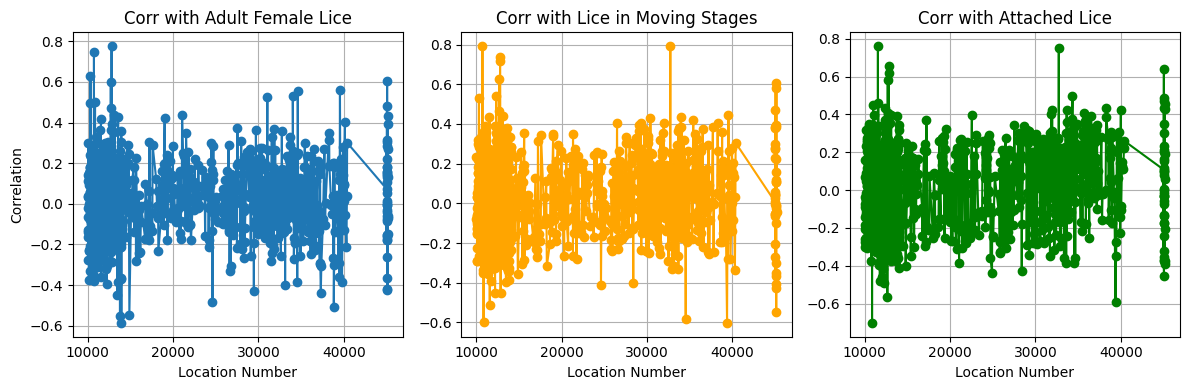

In [13]:
import matplotlib.pyplot as plt

# Assuming 'new_data' is your DataFrame containing the fish farm data
# Creating line plots for each type of lice correlation in the new dataset
plt.figure(figsize=(12, 4))

# Plot for 'Corr with Adult female lice'
plt.subplot(1, 3, 1)
plt.plot(correlation_data['Location number'], correlation_data['Corr with Adult female lice'], marker='o')
plt.title('Corr with Adult Female Lice')
plt.xlabel('Location Number')
plt.ylabel('Correlation')
plt.grid(True)

# Plot for 'Corr with Lice in moving stages'
plt.subplot(1, 3, 2)
plt.plot(correlation_data['Location number'], correlation_data['Corr with Lice in moving stages'], marker='o', color='orange')
plt.title('Corr with Lice in Moving Stages')
plt.xlabel('Location Number')
plt.grid(True)

# Plot for 'Corr with Attached lice'
plt.subplot(1, 3, 3)
plt.plot(correlation_data['Location number'], correlation_data['Corr with Attached lice'], marker='o', color='green')
plt.title('Corr with Attached Lice')
plt.xlabel('Location Number')
plt.grid(True)

plt.tight_layout()
plt.show()


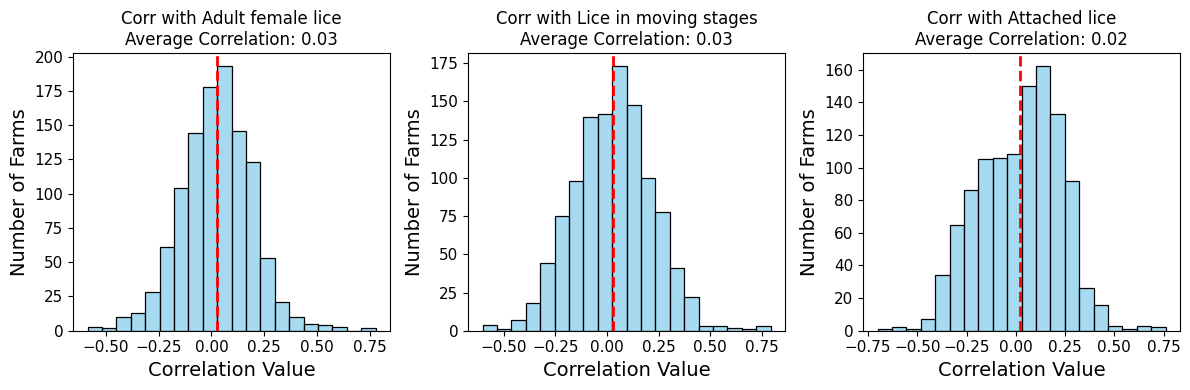

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating histograms with an overlay of the average correlation line for each type of lice

# Defining the correlation types
corr_types = ['Corr with Adult female lice', 'Corr with Lice in moving stages', 'Corr with Attached lice']

plt.figure(figsize=(12, 4))

for i, corr_type in enumerate(corr_types, 1):
    plt.subplot(1, 3, i)
    sns.histplot(correlation_data[corr_type], bins=20, kde=False, color='skyblue')
    avg_corr = correlation_data[corr_type].mean()

    # Overlaying the average line
    plt.axvline(avg_corr, color='red', linestyle='dashed', linewidth=2)
    plt.title(f'{corr_type}\nAverage Correlation: {avg_corr:.2f}')
    plt.xlabel('Correlation Value', fontsize=14)
    plt.ylabel('Number of Farms',fontsize=14)
    plt.xticks(fontsize=11)  # Adjust x-axis tick label size
    plt.yticks(fontsize=11) 
    plt.savefig('your_plot.pdf')

plt.tight_layout()
 
plt.show()


In [23]:
plt.savefig('number_of_farms_and_correlation.pdf')

<Figure size 640x480 with 0 Axes>

In [20]:
positive_counts = {}
negative_counts = {}
for corr_type in ['Corr with Adult female lice', 'Corr with Lice in moving stages', 'Corr with Attached lice']:
    positive_counts[corr_type] = (correlation_data[corr_type] > 0).sum()
    negative_counts[corr_type] = (correlation_data[corr_type] < 0).sum()

# Displaying the counts
print("Positive Counts:", positive_counts)
print("Negative Counts:", negative_counts)

Positive Counts: {'Corr with Adult female lice': 632, 'Corr with Lice in moving stages': 618, 'Corr with Attached lice': 628}
Negative Counts: {'Corr with Adult female lice': 471, 'Corr with Lice in moving stages': 485, 'Corr with Attached lice': 475}


In [21]:
import pandas as pd

# Assuming 'new_data' is your DataFrame
corr_types = ['Corr with Adult female lice', 'Corr with Lice in moving stages', 'Corr with Attached lice']

# Initializing dictionaries to hold the counts
positive_counts = {}
negative_counts = {}

# Calculating positive and negative counts for each type of lice
for corr_type in corr_types:
    positive_counts[corr_type] = (correlation_data[corr_type] > 0).sum()
    negative_counts[corr_type] = (correlation_data[corr_type] < 0).sum()

# Creating a DataFrame for the counts
counts_df = pd.DataFrame({
    'Type of Lice': corr_types,
    'Positive Counts': positive_counts.values(),
    'Negative Counts': negative_counts.values()
})

# Displaying the table
print(counts_df)


                      Type of Lice  Positive Counts  Negative Counts
0      Corr with Adult female lice              632              471
1  Corr with Lice in moving stages              618              485
2          Corr with Attached lice              628              475
